## Decision Tree
Decision trees are used for both classification and regression problems. 
### Key iterms
* Root Node: The top-most decision node in a decision tree.
* Decision Node: A tree node or parent node that splits into one ore more child nodes is called a decision node.
* Leaf or Terminal Node: Bottom nodes that (generally speaking) don’t split any further.
* Splitting: Process of dividing a node into two or more child nodes.
* Pruning: The opposite process of splitting. Removing the child nodes of a decision node is called pruning.    
<img src="decision tree.png">  

## Part 1: Regression tree  
### Main steps

1. Divide the predictor space(the set of possible values for $x_1$, $x_2$,...,$x_p$ into $J$ distinct regions $R_1$, $R_2$,...,$R_J$
2. For every observation that falls into the region $R_j$, the prediction value equals to the mean of response values for training observation in $R_j$ 

### Cost function
$$ \sum_{j=1}^J \sum_{i\in R_j}(y_i-\bar y_{R_j})^2 $$

### Terminal Nodes
Often, we determine the terminal nodes based on two criteria. 
* Maximum Tree Depth.  
This is the maximum number of nodes from the root node of the tree. Once a maximum depth of the tree is met, we must stop splitting adding new nodes. Deeper trees are more complex and are more likely to overfit the training data.
* Minimum Node Records.  
This is the minimum number of training patterns that a given node is responsible for. Once at or below this minimum, we must stop splitting and adding new nodes. Nodes that account for too few training patterns are expected to be too specific and are likely to overfit the training data.

### Recursive binary splitting
We use this top-down, greedy approah to construct regions $R_1$, $R_2$,...,$R_J$

In [2]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

This is a numerical procedure where all the values are lined up and different split points are tried and tested using a cost function. The split with the lowest cost is selected.

### Example

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
%matplotlib inline

In [5]:
dataset = pd.read_csv('petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [6]:
X = dataset.drop('Petrol_Consumption', axis=1)
y = dataset['Petrol_Consumption']

In [7]:
# divide our data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
regressor = DecisionTreeRegressor(random_state=111, max_depth=3, min_samples_leaf=5)
model=regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,552.166667
4,410,436.166667
26,577,552.166667
30,571,618.214286
32,577,552.166667
37,704,618.214286
34,487,552.166667
40,587,509.000000
7,467,509.000000
10,580,436.166667


In [22]:
# evaluate performance
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 55.6
Mean Squared Error: 4461.921088435374
Root Mean Squared Error: 66.79761289473879


In [23]:
# Fit the classifier with default hyper-parameters
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_3 <= 0.65
|   |--- feature_1 <= 4389.50
|   |   |--- feature_0 <= 7.75
|   |   |   |--- value: [618.21]
|   |   |--- feature_0 >  7.75
|   |   |   |--- value: [552.17]
|   |--- feature_1 >  4389.50
|   |   |--- feature_3 <= 0.55
|   |   |   |--- value: [436.17]
|   |   |--- feature_3 >  0.55
|   |   |   |--- value: [509.00]
|--- feature_3 >  0.65
|   |--- value: [758.67]



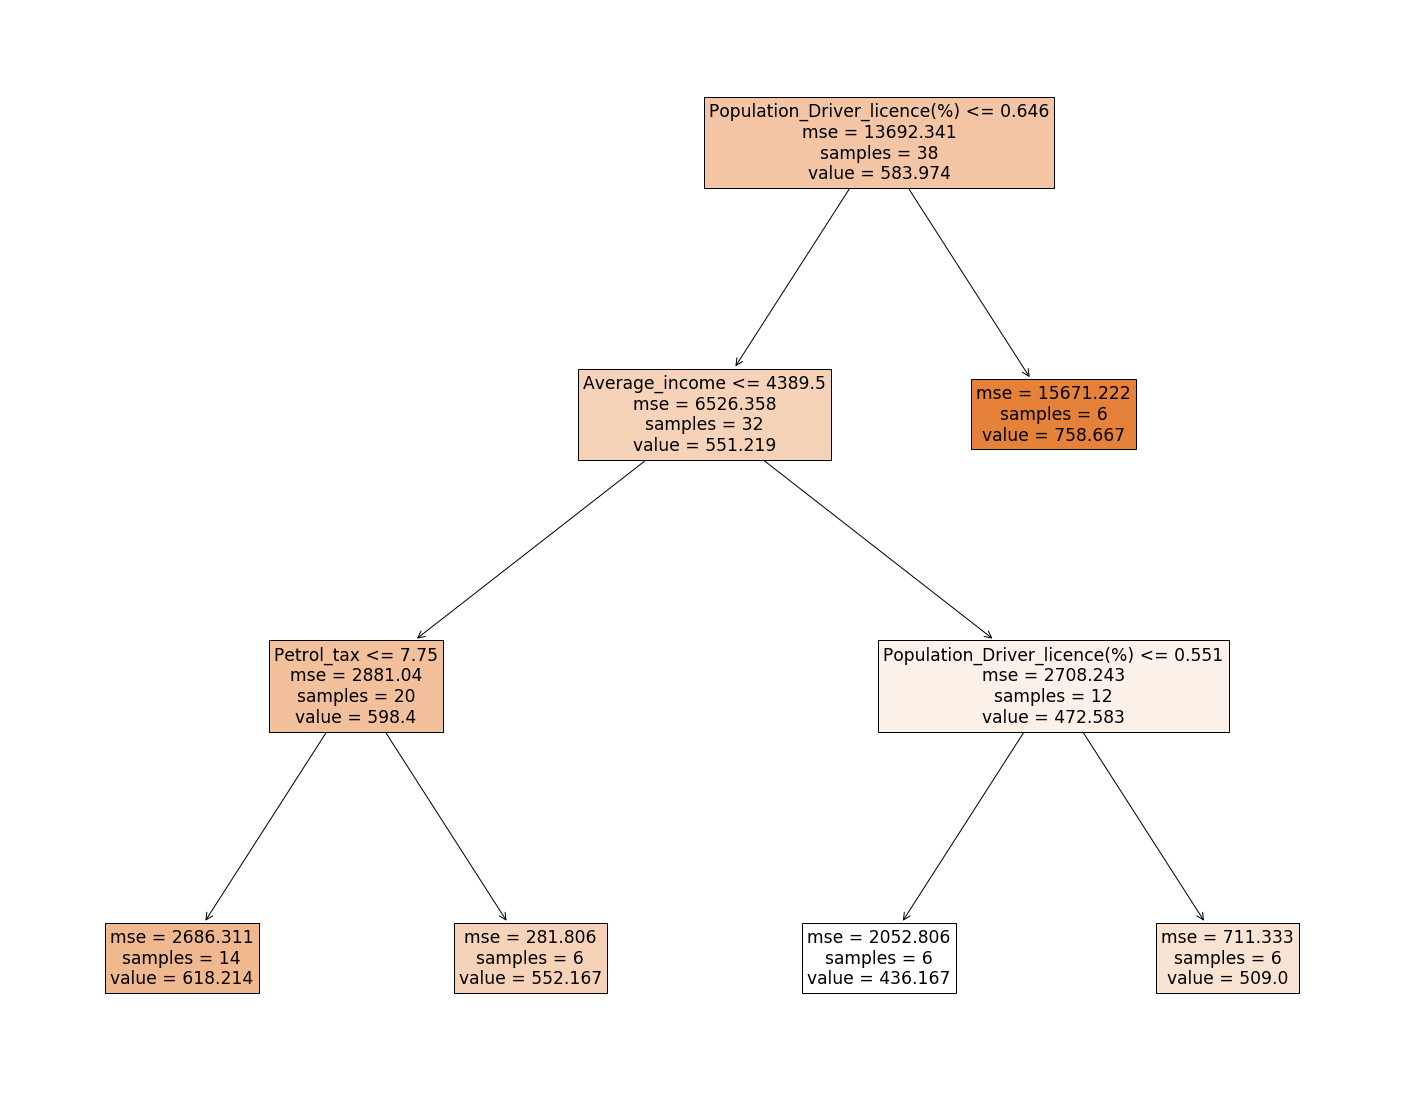

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=X.columns.values, filled=True)

## Part 2: Classification tree  
### Main steps
Each observation belongs to the most commonly occuring class of training observations in the region to which it belongs to.
#### Classification error rate
* Error=1-$max(\hat p_{m_k})$
* Gini index: $G=\sum _{k=1}^K \hat p_{m_k} (1-\hat p_{m_k})$
* Entropy: $D=-\sum \hat p_{m_k} log \hat p_{m_k}$

### Example

In [41]:
n = 500
x1 = np.random.uniform(low=-1, high=1, size=n)
x2 = np.random.uniform(low=-1, high=1, size=n)
prob=x1**2+x2**2<0.6
prob[prob is True]=0.9
prob[prob is False]=0.1
y = np.random.binomial(n=1,p=prob,size=n)

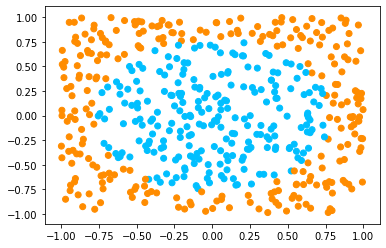

In [45]:
col = np.where(y>0,'deepskyblue','darkorange')
plt.scatter(x=x1,y=x2,c=col)
plt.show()

In [73]:
clf = DecisionTreeClassifier(random_state=110,max_depth=6, min_samples_leaf=20)
model=clf.fit(pd.DataFrame({'x1':x1, 'x2':x2}), y)

In [74]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.72
|   |--- feature_0 <= 0.75
|   |   |--- feature_0 <= -0.72
|   |   |   |--- feature_0 <= -0.81
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.81
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.72
|   |   |   |--- feature_1 <= -0.70
|   |   |   |   |--- feature_1 <= -0.81
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.81
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.70
|   |   |   |   |--- feature_1 <= -0.53
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -0.53
|   |   |   |   |   |--- feature_1 <= 0.52
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.52
|   |   |   |   |   |   |--- class: 1
|   |--- feature_0 >  0.75
|   |   |--- class: 0
|--- feature_1 >  0.72
|   |--- feature_1 <= 0.79
|   |   |--- class: 0
|   |--- feature_1 >  0.79
|   |   |--- class: 0



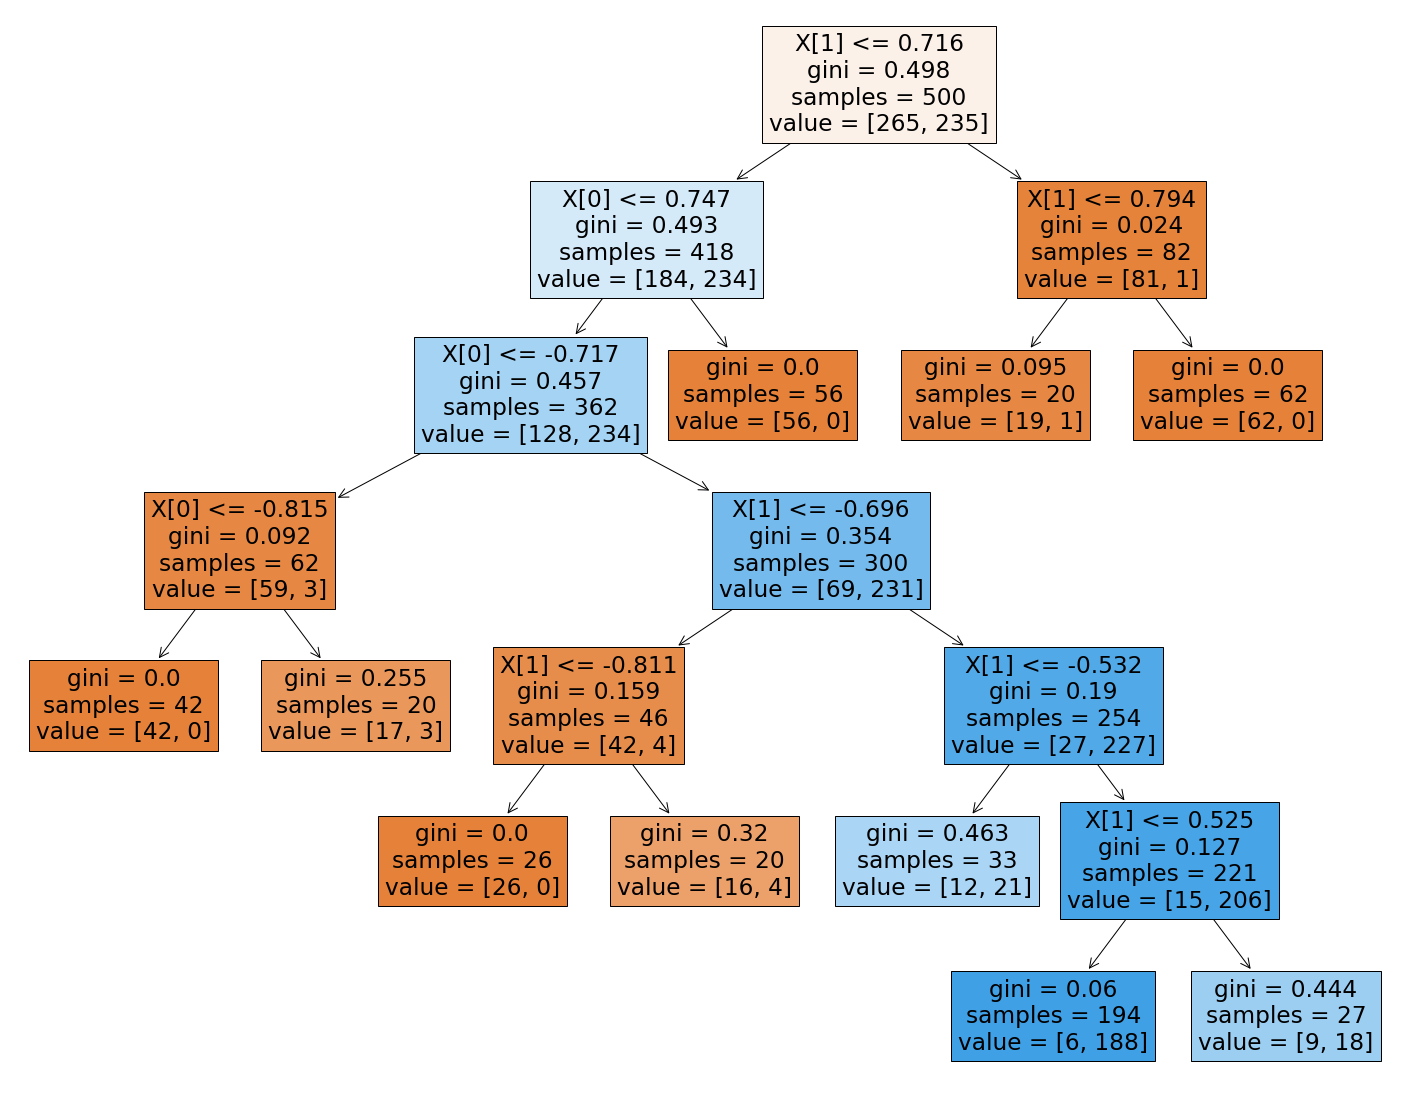

In [75]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

### Now let's visualize the dividing process across each decision node
* The first node is "feature_1 <= 0.716"

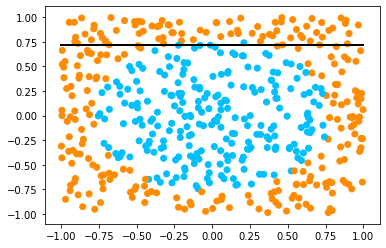

In [67]:
col = np.where(y>0,'deepskyblue','darkorange')
plt.scatter(x=x1,y=x2,c=col)
plt.plot([-1, 1], [0.716, 0.716], color='k', linestyle='-', linewidth=2)
plt.show()

* The second node is "feature_0 <= 0.747"

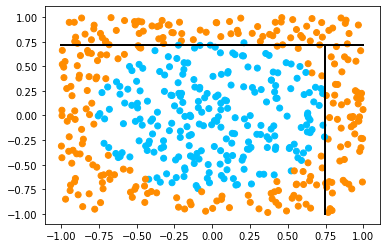

In [68]:
col = np.where(y>0,'deepskyblue','darkorange')
plt.scatter(x=x1,y=x2,c=col)
plt.plot([-1, 1], [0.716, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([0.747, 0.747], [-1, 0.716], color='k', linestyle='-', linewidth=2)
plt.show()

* The third node is "feature_0 <= -0.717"

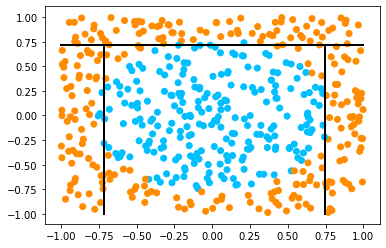

In [76]:
col = np.where(y>0,'deepskyblue','darkorange')
plt.scatter(x=x1,y=x2,c=col)
plt.plot([-1, 1], [0.716, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([0.747, 0.747], [-1, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([-0.717, -0.717], [-1, 0.716], color='k', linestyle='-', linewidth=2)
plt.show()

* The forth node is "feature_1 <= -0.696"

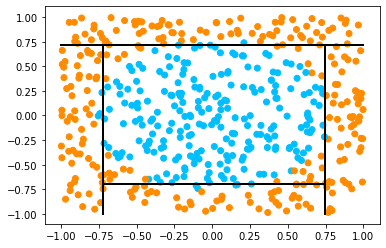

In [77]:
col = np.where(y>0,'deepskyblue','darkorange')
plt.scatter(x=x1,y=x2,c=col)
plt.plot([-1, 1], [0.716, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([0.747, 0.747], [-1, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([-0.72, -0.72], [-1, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([-0.72, -0.72], [-1, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([-0.72, 0.747], [-0.696, -0.696], color='k', linestyle='-', linewidth=2)
plt.show()

#### We can see that these four steps classify our data points well, what if we continue?
* The fifth node is "feature_1 <= -0.532"
* The sixth node is "feature_1 <= 0.525"

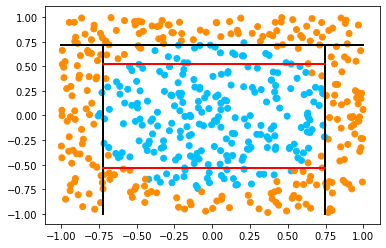

In [78]:
col = np.where(y>0,'deepskyblue','darkorange')
plt.scatter(x=x1,y=x2,c=col)
plt.plot([-1, 1], [0.716, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([0.747, 0.747], [-1, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([-0.72, -0.72], [-1, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([-0.72, -0.72], [-1, 0.716], color='k', linestyle='-', linewidth=2)
plt.plot([-0.72, 0.747], [-0.532, -0.532], color='r', linestyle='-', linewidth=2)
plt.plot([-0.72, 0.747], [0.525, 0.525], color='r', linestyle='-', linewidth=2)
plt.show()

We can see that steps 5 and 6 are not really benifical. Model now suffers from **overfitting**. 